## 統計学基礎の基礎

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
import numpy as np
import numpy.random as rd
import pandas as pd
import html5lib, time, sys
from datetime import datetime as dt
import statsmodels.graphics.tsaplots as tsaplots
import statsmodels.api as sm
import cPickle as pickle
import scipy.stats as st

sns.set(style="whitegrid", palette="muted", color_codes=True)
tips = sns.load_dataset("tips")

### TOEICデータ

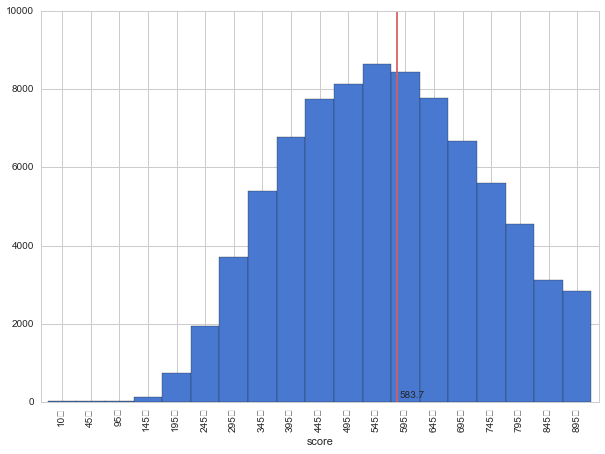

In [6]:
url = 'http://www.toeic.or.jp/toeic/about/data/data_avelist/data_dist01_04.html'
fetched_dataframes = pd.io.html.read_html(url, header=0, index_col=0)
df_total = fetched_dataframes[0]

df_total = df_total[['Unnamed: 5','Unnamed: 6','Unnamed: 7']]
df_total.columns = ['score','num','ratio']
df_total.index = df_total['score']
df_total = df_total.drop([u'（スコア区分）']).drop(['Total']).drop(['score'], axis=1).convert_objects(convert_numeric=True)
df_total['sortkey'] = [int(idx.replace(u'\uff5e','')) for idx in df_total.index]

df_total.sort(columns='sortkey')['num'].plot(kind='bar', color='b', figsize=(10,7),width=1)
plt.plot([11.7,11.7],[0,10000], color='r')
plt.text(11.8, 100, '583.7')
plt.show()

### グラフを描く

19.785942623


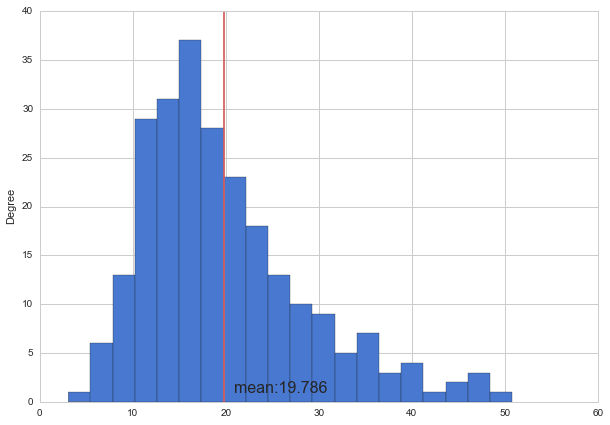

In [7]:
tips.total_bill.plot(kind="hist", bins=20, figsize=(10,7))
m = np.mean(tips.total_bill)
print m
plt.plot([m, m],[0, 40], 'r')
plt.text(21, 1, "mean:{0:.3f}".format(m), size=16)
plt.show()

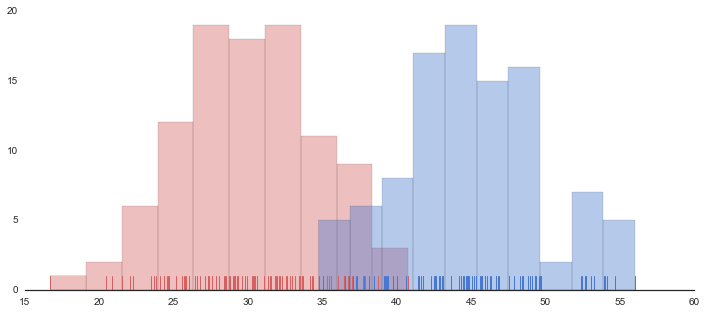

In [8]:
sns.set(style="white", palette="muted", color_codes=True)
rs = np.random.RandomState(11)

# Set up the matplotlib figure
f, axes = plt.subplots(1, 1, figsize=(12, 5), sharex=True)
sns.despine(left=True)

# Generate a random univariate dataset
d = rs.normal(30, 5, size=100)
d2 = rs.normal(45, 5, size=100)

# Plot a simple histogram with binsize determined automatically
sns.distplot(d, kde=False, rug=True, color="r", bins=10)
sns.distplot(d2, kde=False, rug=True, color="b", bins=10)

plt.show()

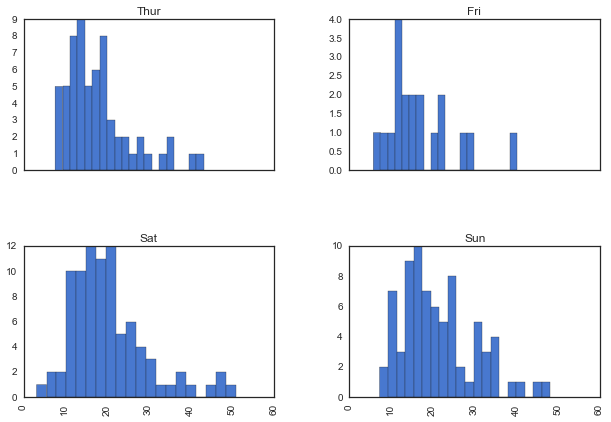

In [9]:
tips.hist(by='day', column='total_bill', bins=20, figsize=(10,7), sharex=True)
plt.show()

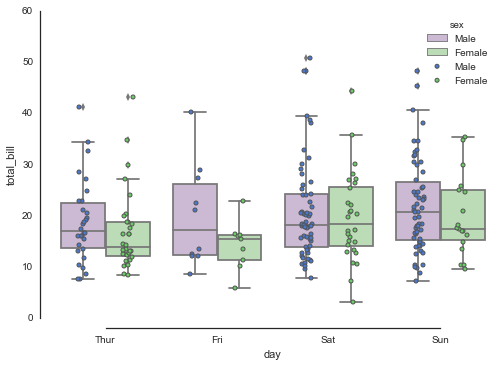

In [10]:
sns.boxplot(x="day", y="total_bill", hue="sex", data=tips, palette="PRGn")
ax = sns.stripplot(x="day", y="total_bill", data=tips,  hue="sex",
                   size=4, jitter=True, edgecolor="gray")
sns.despine(offset=10, trim=True)

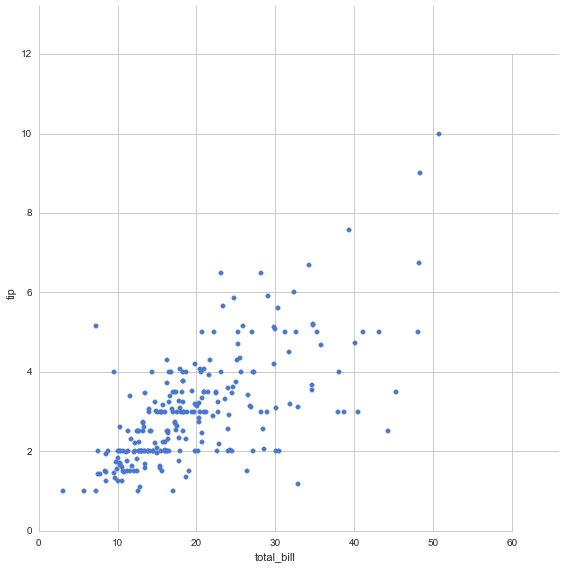

In [11]:
sns.set(style="whitegrid", palette="muted", color_codes=True)
tips = sns.load_dataset("tips")
grid = sns.JointGrid(tips.total_bill, tips.tip, space=0, size=8, ratio=10)
grid.plot_joint(plt.scatter, color="b")
plt.show()

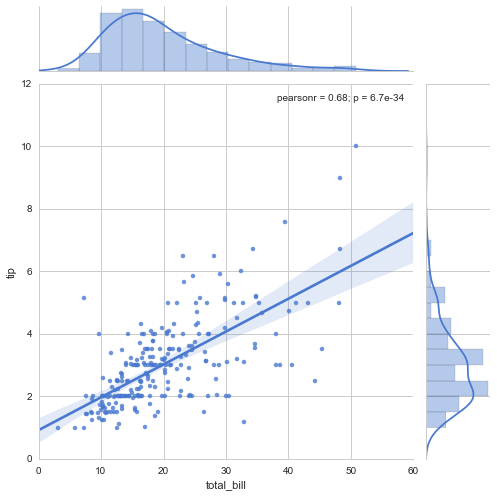

In [12]:
sns.jointplot("total_bill", "tip", data=tips, kind="reg", xlim=(0, 60), ylim=(0, 12), color="b", size=7)
plt.show()


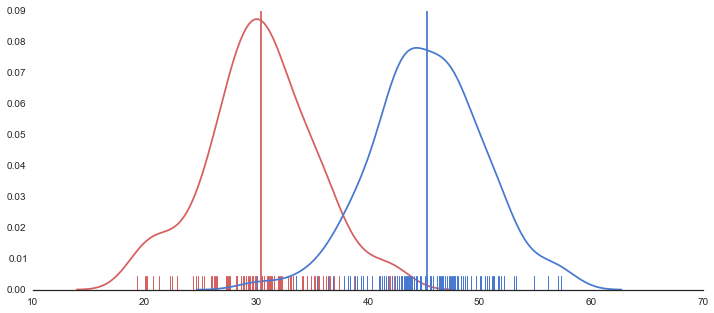

In [13]:
sns.set(style="white", palette="muted", color_codes=True)
rs = np.random.RandomState(10)

# Set up the matplotlib figure
f, axes = plt.subplots(1, 1, figsize=(12, 5), sharex=True)
sns.despine(left=True)

# Generate a random univariate dataset
d = rs.normal(30, 5, size=100)
d2 = rs.normal(45, 5, size=100)

# Plot a kernel density estimate and rug plot
sns.distplot(d, hist=False, rug=True, color="r")#, ax=axes[0, 0])
sns.distplot(d2, hist=False, rug=True, color="b")#, ax=axes[0, 0])

# Calculate average
m = np.mean(d)
m2 = np.mean(d2)

plt.plot([m,m],[0,0.09], 'r')
plt.plot([m2,m2],[0,0.09], 'b')

plt.show()

### 相関係数

,total_bill,tip
total_bill,1.000000,0.675734
tip,0.675734,1.000000


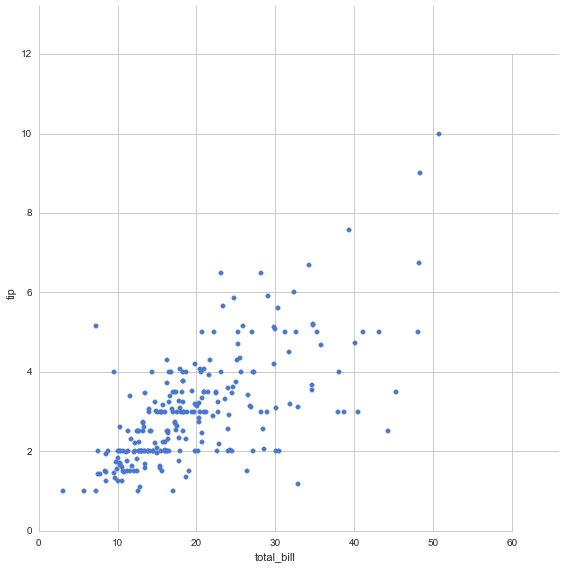

In [14]:
sns.set(style="whitegrid", palette="muted", color_codes=True)
tips = sns.load_dataset("tips")
grid = sns.JointGrid(tips.total_bill, tips.tip, space=0, size=8, ratio=10)
grid.plot_joint(plt.scatter, color="b")
tips[['total_bill', 'tip']].corr()

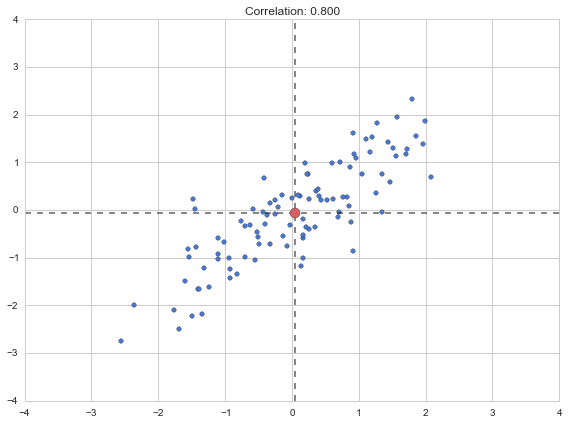

In [17]:
plt.figure(figsize=(8,6))

r = 0.8
mean = [0,0]
cov =  [[1,  r],
        [r,  1]]


X = rd.multivariate_normal(mean, cov, size=100)
m1 = np.mean(X[:,0])
m2 = np.mean(X[:,1])

plt.scatter(X[:,0], X[:,1])
plt.title("Correlation: {0:.3f}".format(r))
plt.scatter([m1], [m2], c="r", s=100, zorder=100)
plt.plot([m1, m1], [-4,4], "k--", alpha=.6)
plt.plot([-4,4], [m2, m2], "k--", alpha=.6)

plt.xlim(-4, 4)
plt.ylim(-4, 4)

plt.tight_layout()
plt.show()

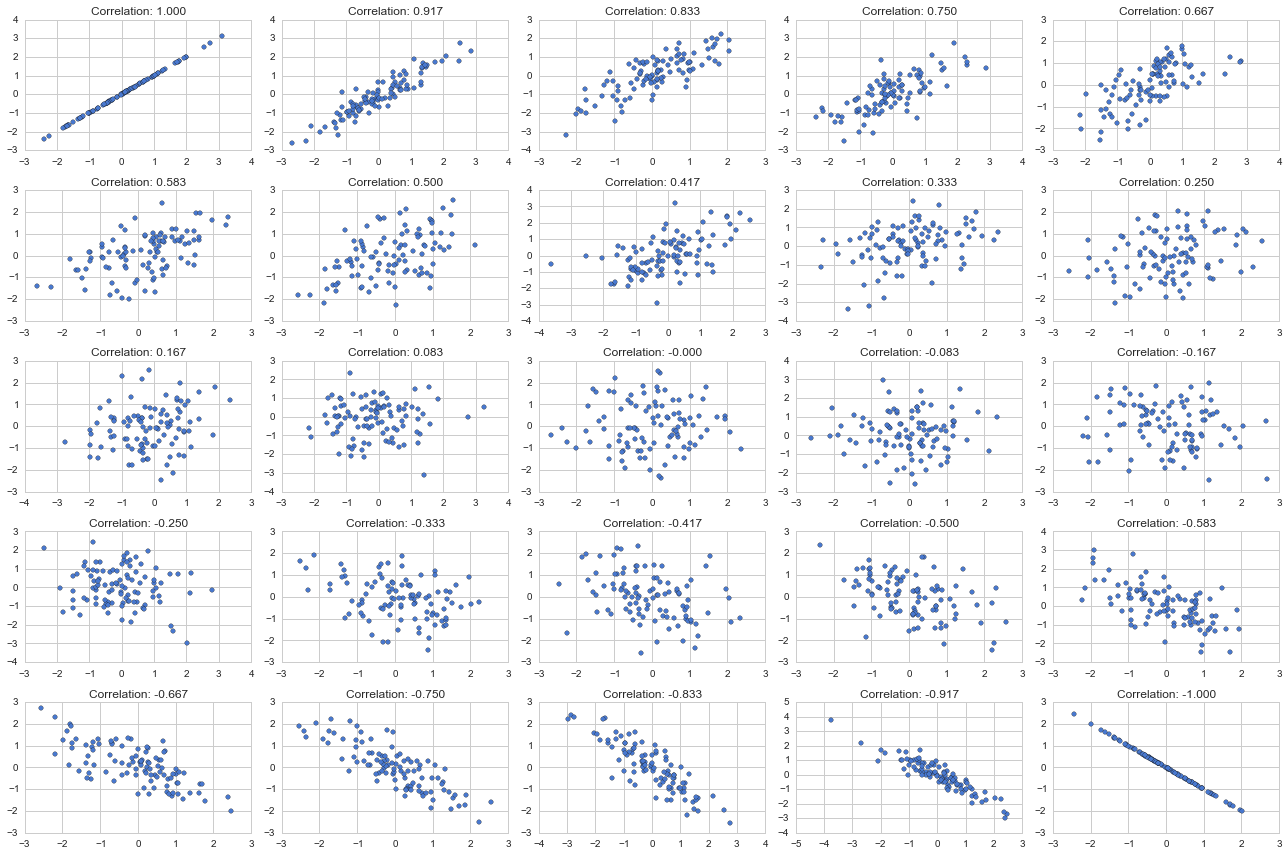

In [18]:
nn = 5
plt.figure(figsize=(18,12))

rel = np.linspace(-1,1, nn * nn)
for n in range(nn * nn):
    plt.subplot(nn, nn, n+1)
    r = -rel[n]
    mean = [0,0]
    cov =  [[1,  r],
            [r,  1]]
    X = rd.multivariate_normal(mean, cov, size=100)
    plt.scatter(X[:,0], X[:,1])
    plt.title("Correlation: {0:.3f}".format(r))


plt.tight_layout()
plt.show()

### 正規分布の成り立ち

In [2]:
# コイン投げ, 20回投げて表が1, 裏が0
coin_toss = st.bernoulli.rvs(p=0.5, size=20)
coin_toss

array([0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1])

### 20回コインを投げて表が出た回数を数える。これを100セット実施

In [3]:
set_20 = []
for i in range(100):
    coin_toss = st.bernoulli.rvs(p=0.5, size=20)
    print np.sum(coin_toss),

12 12 10 6 9 14 9 8 11 7 13 9 6 14 9 7 8 8 13 7 6 10 9 11 10 10 9 9 13 10 11 12 12 11 12 10 6 9 6 11 9 9 9 11 7 10 8 9 8 11 8 11 8 10 13 6 12 12 10 12 8 14 9 9 11 9 14 10 13 9 11 9 10 9 12 8 6 10 11 9 9 11 8 8 8 12 8 10 11 11 10 11 6 7 11 9 10 11 8 10


### 10000セット実施

In [32]:
set_20 = []
for i in range(10000):
    coin_toss = st.bernoulli.rvs(p=0.5, size=20)
    n = np.sum(coin_toss)
    set_20.append(n)

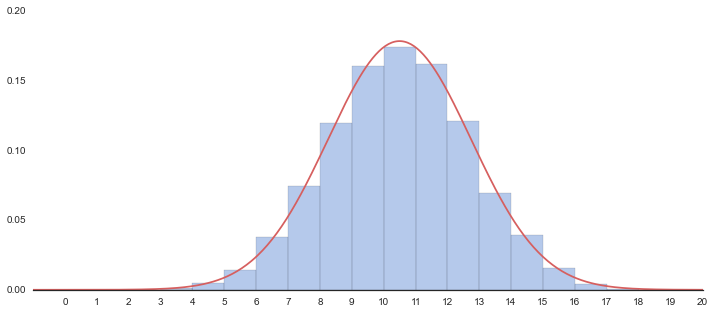

In [37]:
sns.set(style="white", palette="muted", color_codes=True)

# Set up the matplotlib figure
data = np.array(set_20)

f, axes = plt.subplots(1, 1, figsize=(12, 5), sharex=True)
sns.despine(left=True)

m = data.mean()
s = data.std()
# Plot a kernel density estimate and rug plot
sns.distplot(data, hist=True, kde=True, bins=16, rug=False, color="b", kde_kws={"lw":0})
plt.xticks(range(21))

xx = np.linspace(-5, 20, 501)
yy = st.norm.pdf(xx, loc=m, scale=s)
plt.plot(xx+.5,yy,"r")
plt.xlim(-1,20)
plt.ylim(0,0.20)
plt.show()

### 100万件のサンプルデータを生成

In [86]:
rs = np.random.RandomState(71)

# Generate a random univariate dataset
d = rs.normal(30, 5, size=1000000)

### ヒストグラムの描画

average:30.0031636535


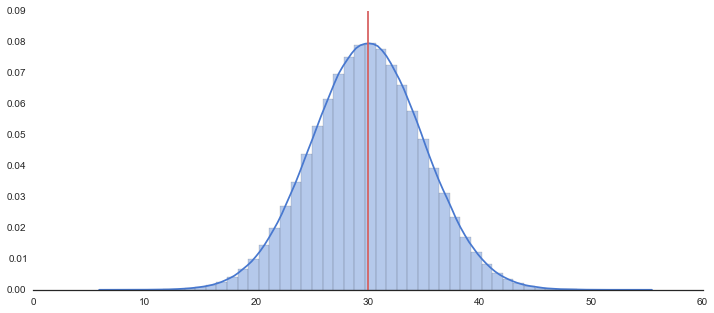

In [87]:
# Set up the matplotlib figure
f, axes = plt.subplots(1, 1, figsize=(12, 5), sharex=True)
sns.despine(left=True)

# Plot a kernel density estimate and rug plot
sns.distplot(d, hist=True, kde=True, rug=False, color="b")

# Calculate average
m = np.mean(d)
print "average:{}".format(m)
plt.plot([m,m],[0,0.09], 'r')

plt.show()

### 割合を数えてみる

In [88]:
d = np.array(d)

all = len(d)              # 全データ数
small = len(d[d < 20])    # 20より小さいものの個数
large = len(d[d > 40])    # 40より大きいものの個数
mid = all - small - large # その中間にある個数

print "all:\t{0:7d}".format(all)
print "small:\t{0:7d}({1:.2f}%)".format(small, small/float(all)*100)
print "mid:\t{0:7d}({1:.2f}%)".format(mid, mid/float(all)*100)
print "large:\t{0:7d}({1:.2f}%)".format(large, large/float(all)*100)


all:	1000000
small:	  22641(2.26%)
mid:	 954600(95.46%)
large:	  22759(2.28%)


### 100万件から100個サンプリングする

In [113]:
df = pd.DataFrame(d, columns=['data'])
sample = df.sample(n=100,random_state=71)
sample

,data
329401,19.371665
818859,29.955302
318049,30.866991
167751,24.089591
830005,40.630279
212727,34.189804
22266,28.024455
400252,32.644450
509328,35.015482
119191,21.994045


### 100個のヒストグラム

average:data    30.588533
dtype: float64
sd:data    5.036523
dtype: float64
lower:29.581, upper:31.596


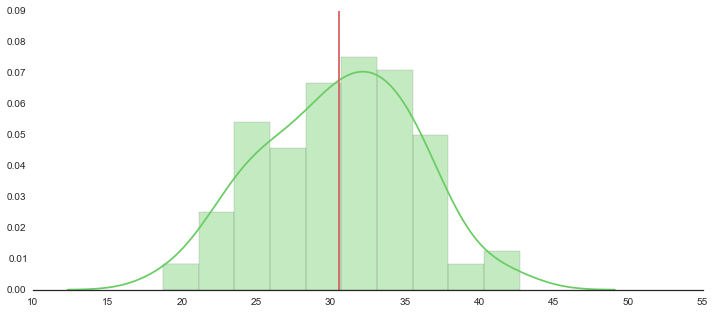

In [114]:
f, axes = plt.subplots(1, 1, figsize=(12, 5), sharex=True)
sns.despine(left=True)

# Plot a kernel density estimate and rug plot
sns.distplot(sample, hist=True, kde=True, rug=False, color="g", bins=10)

# Calculate average
n = len(sample)
m = np.mean(sample)
sd = np.sqrt(np.var(sample))
print "average:{}".format(m)
print "sd:{}".format(sd)
print "lower:{0:.3f}, upper:{1:.3f}".format(float(m-2*sd/np.sqrt(n)), float(m+2*sd/np.sqrt(n)))

plt.plot([m,m],[0,0.09], 'r')

plt.xlim(10,55)
plt.show()

average:data    30.588533
dtype: float64
sd:data    5.036523
dtype: float64
lower:29.581, upper:31.596


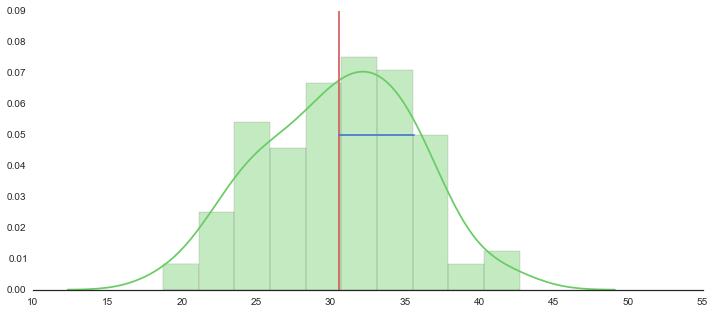

In [115]:
f, axes = plt.subplots(1, 1, figsize=(12, 5), sharex=True)
sns.despine(left=True)

# Plot a kernel density estimate and rug plot
sns.distplot(sample, hist=True, kde=True, rug=False, color="g", bins=10)

# Calculate average
n = len(sample)
m = np.mean(sample)
sd = np.sqrt(np.var(sample))
print "average:{}".format(m)
print "sd:{}".format(sd)
print "lower:{0:.3f}, upper:{1:.3f}".format(float(m-2*sd/np.sqrt(n)), float(m+2*sd/np.sqrt(n)))

plt.plot([m,m],[0,0.09], 'r')
plt.plot([m,m+sd],[0.05,0.05], 'b')

plt.xlim(10,55)
plt.show()

average:data    30.588533
dtype: float64
sd:data    5.036523
dtype: float64
lower:29.581, upper:31.596


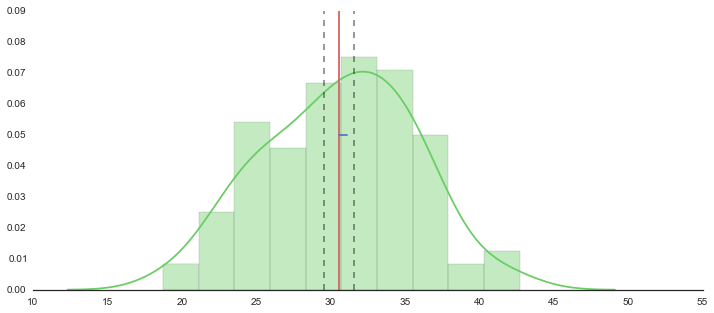

In [116]:
f, axes = plt.subplots(1, 1, figsize=(12, 5), sharex=True)
sns.despine(left=True)

# Plot a kernel density estimate and rug plot
sns.distplot(sample, hist=True, kde=True, rug=False, color="g", bins=10)

# Calculate average
n = len(sample)
m = np.mean(sample)
sd = np.sqrt(np.var(sample))
print "average:{}".format(m)
print "sd:{}".format(sd)
print "lower:{0:.3f}, upper:{1:.3f}".format(float(m-2*sd/np.sqrt(n)), float(m+2*sd/np.sqrt(n)))

plt.plot([m,m],[0,0.11], 'r')
plt.plot([m,m+sd/np.sqrt(n)],[0.05,0.05], 'b')

plt.plot([m-2*sd/np.sqrt(n),m-2*sd/np.sqrt(n)],[0,0.11], "k--", alpha=.5)
plt.plot([m+2*sd/np.sqrt(n),m+2*sd/np.sqrt(n)],[0,0.11], "k--", alpha=.5)

plt.xlim(10,55)
plt.ylim(0,.09)
plt.show()

average:data    30.588533
dtype: float64
sd:data    5.036523
dtype: float64
lower:29.581, upper:31.596


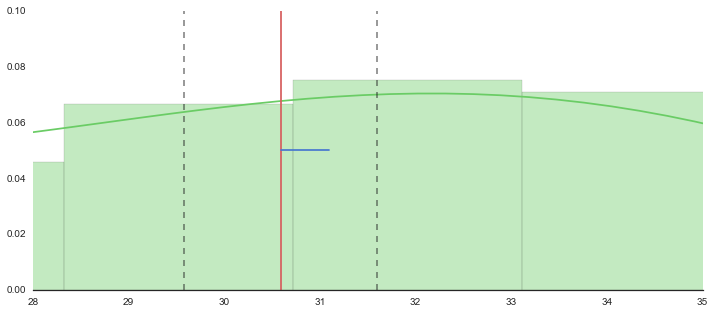

In [117]:
f, axes = plt.subplots(1, 1, figsize=(12, 5), sharex=True)
sns.despine(left=True)

# Plot a kernel density estimate and rug plot
sns.distplot(sample, hist=True, kde=True, rug=False, color="g", bins=10)

# Calculate average
n = len(sample)
m = np.mean(sample)
sd = np.sqrt(np.var(sample))
print "average:{}".format(m)
print "sd:{}".format(sd)
print "lower:{0:.3f}, upper:{1:.3f}".format(float(m-2*sd/np.sqrt(n)), float(m+2*sd/np.sqrt(n)))

plt.plot([m,m],[0,0.11], 'r')
plt.plot([m,m+sd/np.sqrt(n)],[0.05,0.05], 'b')

plt.plot([m-2*sd/np.sqrt(n),m-2*sd/np.sqrt(n)],[0,0.11], "k--", alpha=.5)
plt.plot([m+2*sd/np.sqrt(n),m+2*sd/np.sqrt(n)],[0,0.11], "k--", alpha=.5)

plt.xlim(28,35)
plt.ylim(0,.10)
plt.show()

### たくさん書いて眺めてみる

(0,0) (0,1) (0,2) (0,3) (1,0) (1,1) (1,2) (1,3) (2,0) (2,1) (2,2) (2,3) (3,0) (3,1) (3,2) (3,3)


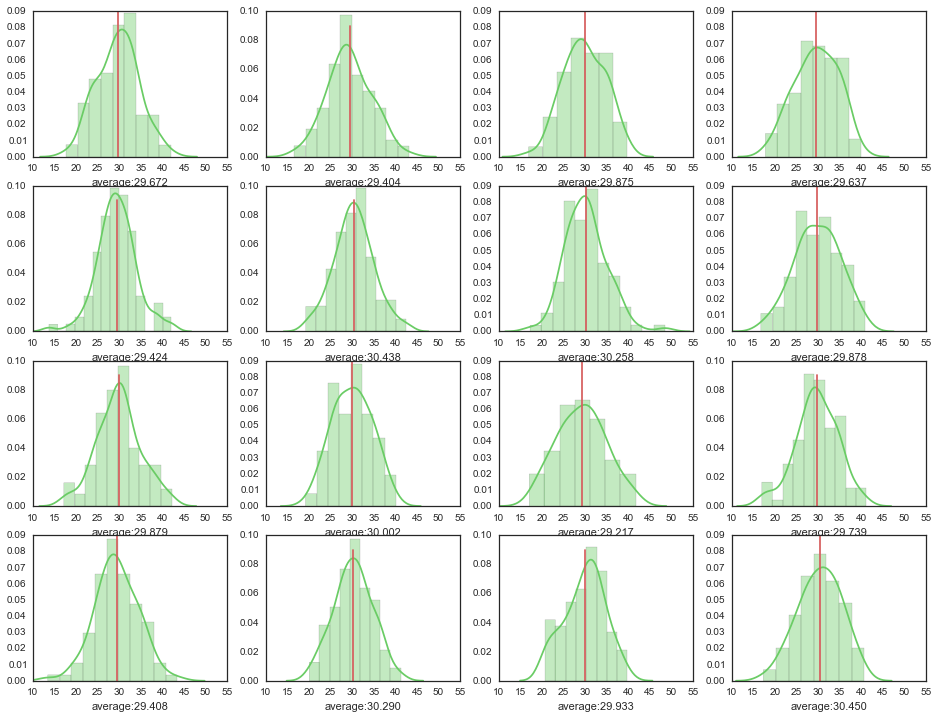

In [118]:
ncol = 4
nrow = 4

f, axes = plt.subplots(nrow, ncol, figsize=(nrow*4, ncol*3))

for i in range(nrow):
    for j in range(ncol):
        print "({},{})".format(i, j), 
        sample = df.sample(n=100)
        m = np.mean(sample)
        sns.distplot(sample, hist=True, kde=True, rug=False, color="g", ax=axes[i, j], 
                     axlabel="average:{0:.3f}".format(float(m)))
        axes[i, j].plot([m,m],[0,0.09], 'r')
        axes[i, j].set_xlim(10,55)


### さらにたくさん(1000回)サンプリングして、その平均値を集めてみる

In [126]:
%time ave_list = [np.mean(df.sample(n=100)) for _ in range(1000)]

CPU times: user 3min 38s, sys: 13.1 s, total: 3min 51s
Wall time: 3min 59s


### 1000個の平均値でヒストグラムを描いてみる

average:30.0018428235


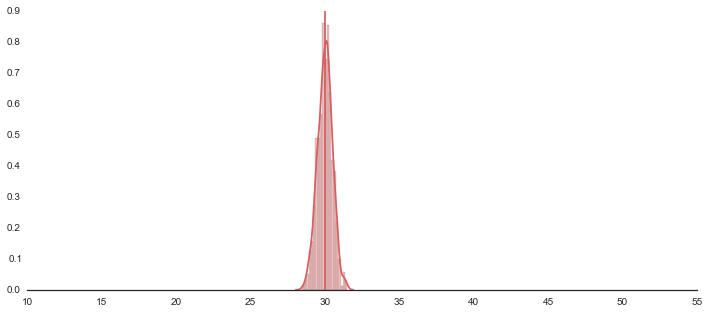

In [127]:
f, axes = plt.subplots(1, 1, figsize=(12, 5), sharex=True)
sns.despine(left=True)

# Plot a kernel density estimate and rug plot
sns.distplot(ave_list, hist=True, kde=True, rug=False, bins=20, color="r")

# Calculate average
m = np.mean(ave_list)
print "average:{}".format(m)
plt.plot([m,m],[0,0.9], 'r')
plt.xlim(10,55)
plt.show()

### 拡大

average:30.0018428235
sd:0.499635405099


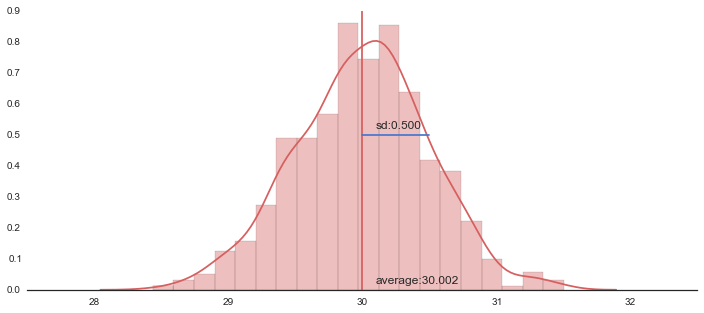

In [128]:
f, axes = plt.subplots(1, 1, figsize=(12, 5), sharex=True)
sns.despine(left=True)

# Plot a kernel density estimate and rug plot
sns.distplot(ave_list, hist=True, kde=True, rug=False, bins=20, color="r")

# Calculate average
m = np.mean(ave_list)
sd = np.sqrt(np.var(ave_list))
print "average:{}".format(m)
print "sd:{}".format(sd)
plt.plot([m,m],[0,0.9], 'r')
plt.text(m+.1,0.02,"average:{0:.3f}".format(m), size=12)
plt.plot([m,m+sd],[0.5,0.5],"b")
plt.text(m+.1,0.52,"sd:{0:.3f}".format(sd), size=12)
#plt.plot([m-2*sd,m+2*sd],[0.4,0.4])
#plt.plot([m-2*sd,m-2*sd],[0,0.9], "k--", alpha=.5)
#plt.plot([m+2*sd,m+2*sd],[0,0.9], "k--", alpha=.5)

plt.xlim(27.5,32.5)
plt.show()

### 信頼区間を表示

average:30.0018428235
sd:0.499635405099


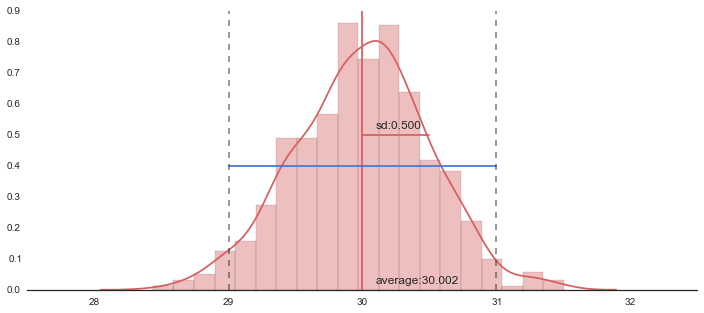

In [129]:

f, axes = plt.subplots(1, 1, figsize=(12, 5), sharex=True)
sns.despine(left=True)

# Plot a kernel density estimate and rug plot
sns.distplot(ave_list, hist=True, kde=True, rug=False, bins=20, color="r")

# Calculate average
m = np.mean(ave_list)
sd = np.sqrt(np.var(ave_list))
print "average:{}".format(m)
print "sd:{}".format(sd)
plt.plot([m,m],[0,0.9], 'r')
plt.text(m+.1,0.02,"average:{0:.3f}".format(m), size=12)
plt.plot([m,m+sd],[0.5,0.5],"r")
plt.text(m+.1,0.52,"sd:{0:.3f}".format(sd), size=12)
plt.plot([m-2*sd,m+2*sd],[0.4,0.4])
plt.plot([m-2*sd,m-2*sd],[0,0.9], "k--", alpha=.5)
plt.plot([m+2*sd,m+2*sd],[0,0.9], "k--", alpha=.5)

plt.xlim(27.5,32.5)
plt.show()

average:30.0018428235
sd:0.499635405099
lower:29.003, upper:31.001


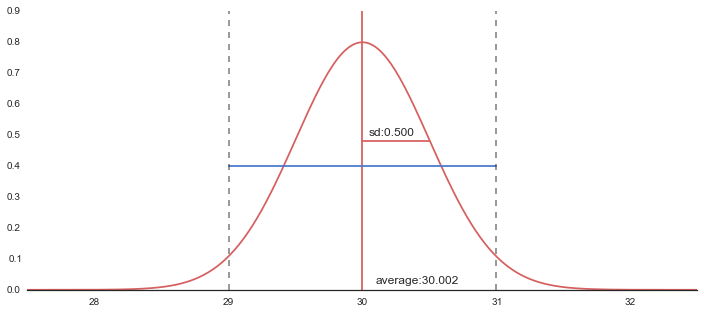

In [130]:

f, axes = plt.subplots(1, 1, figsize=(12, 5), sharex=True)
sns.despine(left=True)

# Plot a kernel density estimate and rug plot
#sns.distplot(ave_list, hist=True, kde=True, rug=False, bins=20, color="r")

# Calculate average
m = np.mean(ave_list)
sd = np.sqrt(np.var(ave_list))

xx = np.linspace(27.5,32.5, 301)
yy = st.norm.pdf(xx, loc=m, scale=sd)

plt.plot(xx,yy,"r")

print "average:{}".format(m)
print "sd:{}".format(sd)
print "lower:{0:.3f}, upper:{1:.3f}".format(m-2*sd, m+2*sd)

plt.plot([m,m],[0,0.9], 'r')
plt.text(m+.1,0.02,"average:{0:.3f}".format(m), size=12)
plt.plot([m,m+sd],[0.48,0.48],"r")
plt.text(m+.05,0.50,"sd:{0:.3f}".format(sd), size=12)
plt.plot([m-2*sd,m+2*sd],[0.4,0.4])
plt.plot([m-2*sd,m-2*sd],[0,0.9], "k--", alpha=.5)
plt.plot([m+2*sd,m+2*sd],[0,0.9], "k--", alpha=.5)

plt.xlim(27.5,32.5)
plt.show()

### 標本平均の信頼区間をいくつも描いてみる

In [72]:
sample = [df.sample(n=100) for _ in range(50)]

In [73]:
res = []
for d in sample:
    m = np.mean(d)
    sd = np.sqrt(np.var(d))
    n = len(d)
    upper = m + 2*sd/np.sqrt(n)
    lower = m - 2*sd/np.sqrt(n)
    #print "(u:{0:.3f}, l:{1:.3f},)".format(float(upper), float(lower))
    res.append((float(lower), float(upper)))

0.04


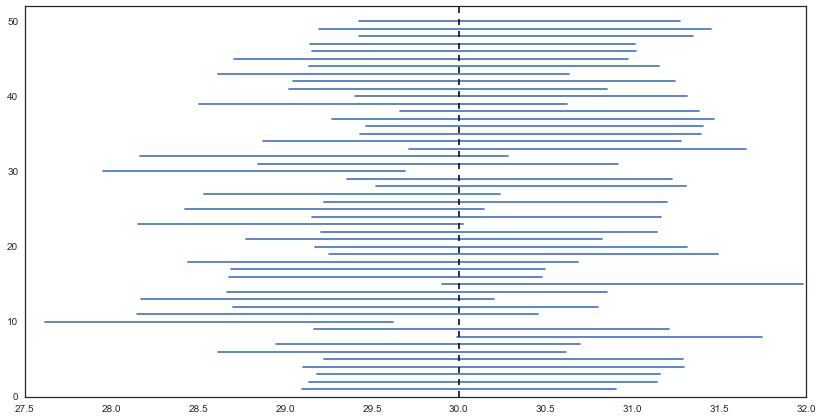

In [77]:
plt.figure(figsize=(14, 7))

cnt = 0
for i, d in enumerate(res):
    plt.plot([d[0],d[1]], [i+1, i+1], "b")
    if d[0] > 30 or d[1] < 30:
        cnt += 1
    
plt.plot([30, 30],[0,52], "k--")
plt.ylim(0,52)
print cnt/float(len(res))

### 母集団の平均の検定

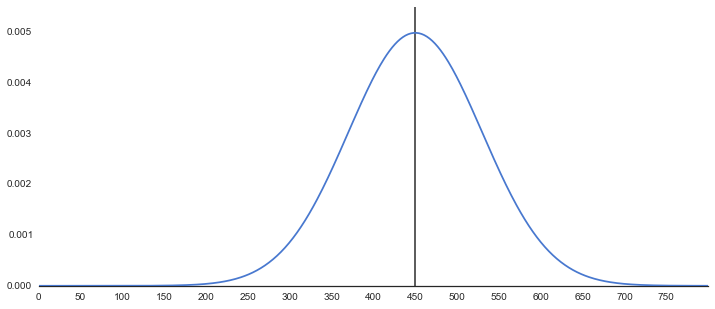

In [191]:
# 母集団
np.random.seed(32)

f, axes = plt.subplots(1, 1, figsize=(12, 5), sharex=True)
sns.despine(left=True)

m = 450
sd = 80

xx = np.linspace(0,800, 501)
yy = st.norm.pdf(xx, loc=m, scale=sd)

plt.plot(xx,yy,zorder=100)
plt.xticks(range(0,800,50))
plt.plot([450,450],[0,0.18],"k",alpha=.8)

plt.ylim(0,0.0055)
plt.show()

[430 534 504 463 520 504 575 569 437 402 402 613 602 494 412 467 579 486
 450 531 498 392 489 424 461 415 417 386 545 511 372 555 727 391 430 309]
data size:36
average:480.444444444
sd:82.0120060467


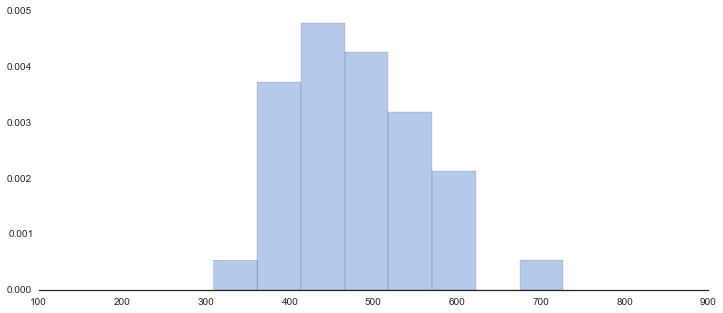

In [243]:
# 今年の新入生の結果(36人分)

np.random.seed(32)
data = st.norm.rvs(loc=480, scale=80, size=36)
data = np.array(map(int, data)) - 22

data[7] -= 22
data[1]  -= 2
print data

f, axes = plt.subplots(1, 1, figsize=(12, 5), sharex=True)
sns.despine(left=True)

n = len(data)
m = data.mean()
sd = data.std()
m_sd = sd/np.sqrt(n)

print "data size:{}".format(n)
print "average:{}".format(m)
print "sd:{}".format(sd)

xx = np.linspace(-15,10, 501)
yy = st.norm.pdf(xx, loc=m, scale=sd)

sns.distplot(data, hist=True, kde=True, bins=8, rug=False, color="b", kde_kws={"lw":0})
plt.show()

data size:36
average:480.444444444
sd:82.0120060467
m_sd:13.6686676744
lower:453.107, upper:507.782


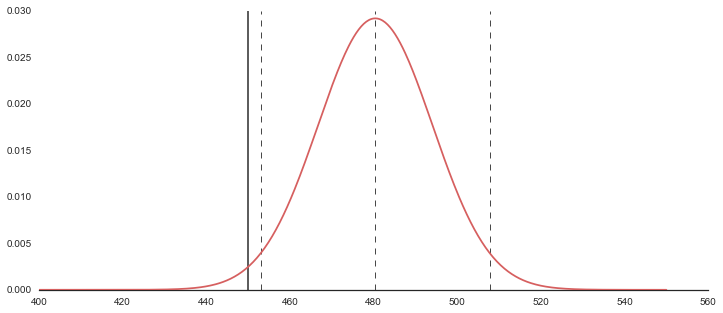

In [259]:
# 今年の新入生の結果(36人分)
f, axes = plt.subplots(1, 1, figsize=(12, 5), sharex=True)
sns.despine(left=True)

n = len(data)
m = data.mean()
sd = data.std()
m_sd = sd/np.sqrt(n)
up  = m+2*m_sd
low = m-2*m_sd

print "data size:{}".format(n)
print "average:{}".format(m)
print "sd:{}".format(sd)
print "m_sd:{}".format(sd/np.sqrt(n)) 
print "lower:{0:.3f}, upper:{1:.3f}".format(low, up)

xx = np.linspace(400,550, 501)
yy = st.norm.pdf(xx, loc=m, scale=m_sd)

plt.plot(xx,yy,"r",zorder=100)
plt.plot([450,450],[0,0.03],"k",alpha=.8)

plt.plot([m,m],[0,0.03],"k--", lw=1, alpha=.8)
plt.plot([low, low],[0,0.03],"k--", lw=1, alpha=.8)
plt.plot([up, up],[0,0.03],"k--", lw=1, alpha=.8)

plt.show()